In [1]:
import pandas

# Load a Data Set

This is a rather simple dataset. It is easy to get a good performance with even very simple classifiers.

In [2]:
features = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
    "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",
    "Proanthocyanins", "Color intensity", "Hue",
    "OD280/OD315 of diluted wines", "Proline"]
target = 'Class'
df = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=[target] + features)

# Preprocess data

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df_scaled = pandas.DataFrame(StandardScaler().fit_transform(df[features]), columns=features)
df_scaled[target] = df[target]

/usr/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/lib/python2.7/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
train_data_s, test_data_s = train_test_split(df_scaled, test_size=0.2)

In [6]:
N, _ = train_data_s.shape
N_test, _ = test_data_s.shape

# Bootstrapping: Bagging predictors

The third way we can use boot strapping is through bagging predictors

In [66]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=10), n_estimators=100)
bagging.fit(train_data_s[features], train_data_s[target])

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [67]:
# Now let's predict!

p_test = bagging.predict_proba(test_data_s[features])

In [68]:
# Find the maximum probability assigned to a label for every example
import numpy
p_max = numpy.zeros(N_test)
for t in range(N_test):
    p_max[t] = max(p_test[t])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  0., 20.]),
 array([0.471  , 0.47629, 0.48158, 0.48687, 0.49216, 0.49745, 0.50274,
        0.50803, 0.51332, 0.51861, 0.5239 , 0.52919, 0.53448, 0.53977,
        0.54506, 0.55035, 0.55564, 0.56093, 0.56622, 0.57151, 0.5768 ,
        0.58209, 0.58738, 0.59267, 0.59796, 0.60325, 0.60854, 0.61383,
        0.61912, 0.62441, 0.6297 , 0.63499, 0.64028, 0.64557, 0.65086,
        0.65615, 0.66144, 0.66673, 0.67202, 0.67731, 0.6826 , 0.68789,
        

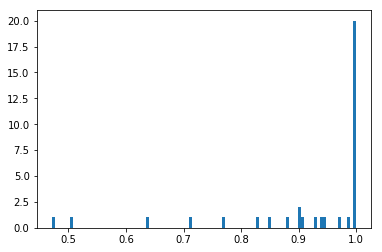

In [69]:
# A histogram! 
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(p_max,100)